## Árbores de decisión TITANIC
## Ralphy Núñez Mercado
Tomando como base este ejemplo de árboles de decisión, crea un modelo de árbol de decisión para estimar las predicciones de supervivencia de los pasajeros del Titanic.  Este es un ejemplo muy típico así que no tendrás problemas para analizarlo.

Visualiza además la matriz de confusión e indica todos los valores de las métricas que pueden utilizarse en este ejemplo.

Utiliza el dataset de Kaggle del Titanic

Compáralo con otros modelos/algoritmos ya vistos y explica tus conclusiones.


### Import necesarios

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


### Cargar csv 

In [75]:
df = pd.read_csv('train.csv')

df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Normalizar el csv

In [76]:

df.columns=['idpasajero','sobrevivio','clase','nombre','sexo','edad','sibsp','parch','ticket','tarifa','cabina','embarque']

df = df.drop(['idpasajero','nombre','sibsp','parch','ticket','cabina'],axis=1)


df['embarque'] = df.embarque.map({ 'Q': 2, 'S' : 1, 'C' : 0})
df['sexo'] = df.sexo.map({'male': 1, 'female': 0})

df



,sobrevivio,clase,sexo,edad,tarifa,embarque
0,0,3,1,22.0,7.2500,1.0
1,1,1,0,38.0,71.2833,0.0
2,1,3,0,26.0,7.9250,1.0
3,1,1,0,35.0,53.1000,1.0
4,0,3,1,35.0,8.0500,1.0
...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,1.0
887,1,1,0,19.0,30.0000,1.0
888,0,3,0,NaN,23.4500,1.0
889,1,1,1,26.0,30.0000,0.0


## Distribución de supervientes

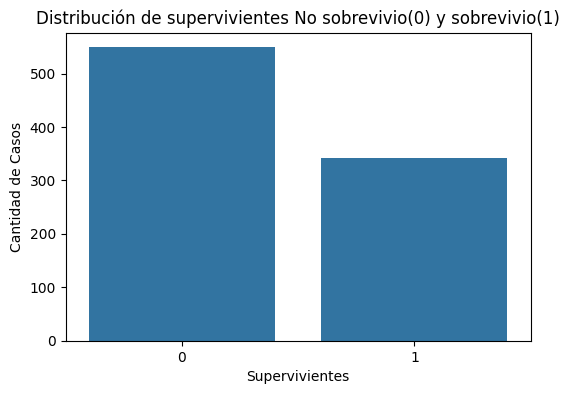

In [77]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sobrevivio', data=df)

plt.title('Distribución de supervivientes No sobrevivio(0) y sobrevivio(1)')
plt.xlabel('Supervivientes')
plt.ylabel('Cantidad de Casos')

plt.show()


### Dividir el dataset

In [78]:
X=df[['clase','sexo','edad','tarifa','embarque']]
y=df['sobrevivio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Entrenamiento del modelo

In [79]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)


tree_clf2 = DecisionTreeClassifier(random_state=42)
tree_clf2.fit(X, y)


DecisionTreeClassifier(random_state=42)

### Estadísticas del modelo

In [80]:
print(f"Con max_depth = 2 y random_state = 42: {tree_clf.score(X_test,y_test)}")

print(f"Con random_state=42: {tree_clf2.score(X_test,y_test)}")


Con max_depth = 2 y random_state = 42: 0.8268156424581006
Con random_state=42: 0.9888268156424581


### Visualización del árbol de decisión

In [81]:

export_graphviz(tree_clf, 
                out_file='ejemplo_titanic.dot',
                feature_names=['clase','sexo','edad','tarifa','embarque'],
                class_names=X.columns,
                rounded=True,
                filled=True)


In [82]:
! dot -Tpng ejemplo_titanic.dot -o ejemplo_titanic.png

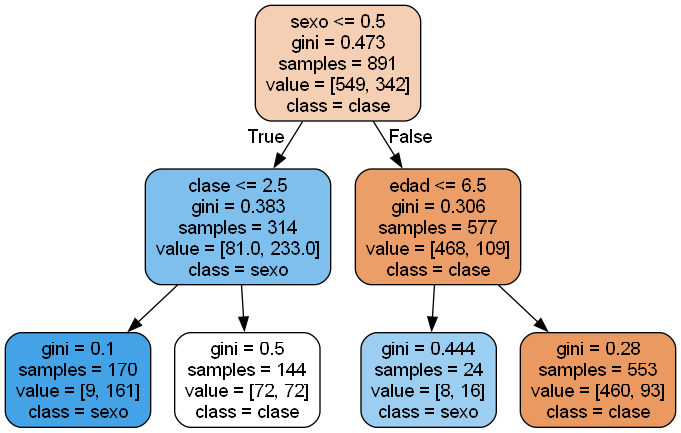

### Hacer la prediccion y dibujar la matriz de confunsión 

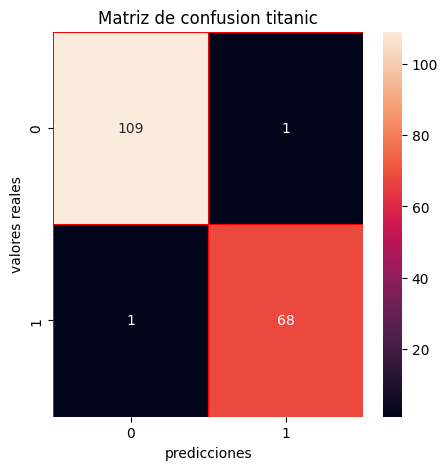

In [83]:

predicciones = tree_clf2.predict(X_test)

cm= confusion_matrix(y_test,predicciones) 

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("predicciones")
plt.ylabel("valores reales")
plt.title("Matriz de confusion titanic")
plt.show()

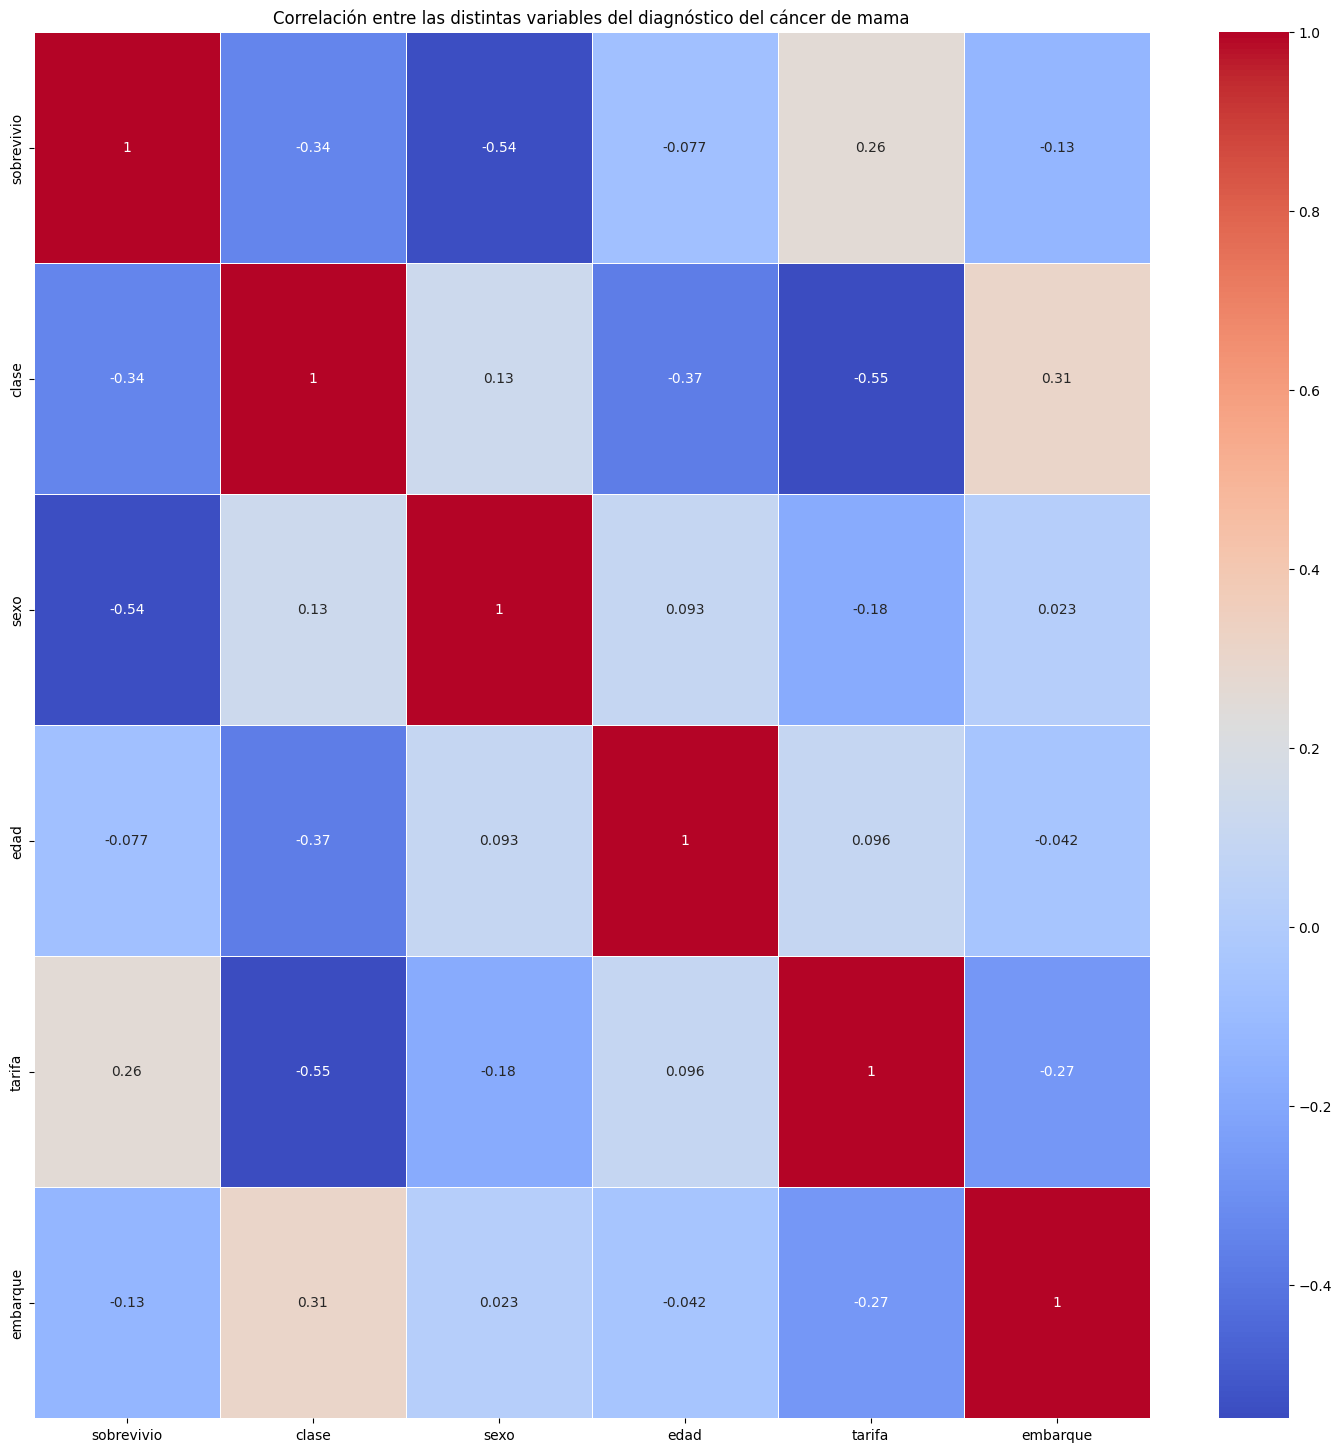

In [84]:
plt.figure(figsize=(18,18))
plt.title("Correlación entre las distintas variables del diagnóstico del cáncer de mama")
sns.heatmap(df.corr(), linewidths=0.5, cmap="coolwarm", annot=True)
plt.show()